In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
heart = fetch_openml('heart-disease', as_frame=True)
df = heart.frame

display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [2]:
print(df.shape)
print(df.columns.tolist())

(303, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
print("Missing Values?\n", df.isnull().sum())

Missing Values?
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
print("Data types:\n", df.dtypes)

Data types:
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object


In [11]:
for column in df.columns:
    if df[column].dtype == "object":
        print(f'{column} : {df[column].unique()}')

In [12]:
X = df.drop("target", axis = 1)
y = df["target"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (303, 13)
y shape: (303,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision & Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8852
Confusion Matrix:
 [[25  4]
 [ 3 29]]
Precision: 0.8788
Recall: 0.9062


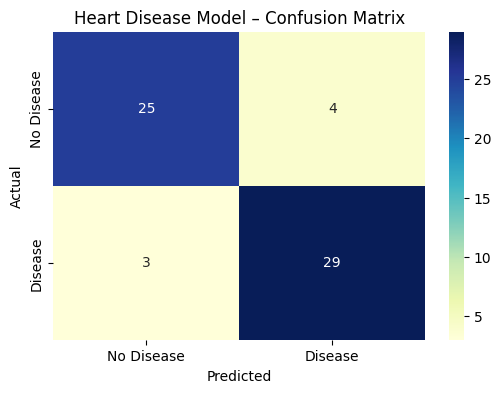

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heart Disease Model – Confusion Matrix")
plt.show()

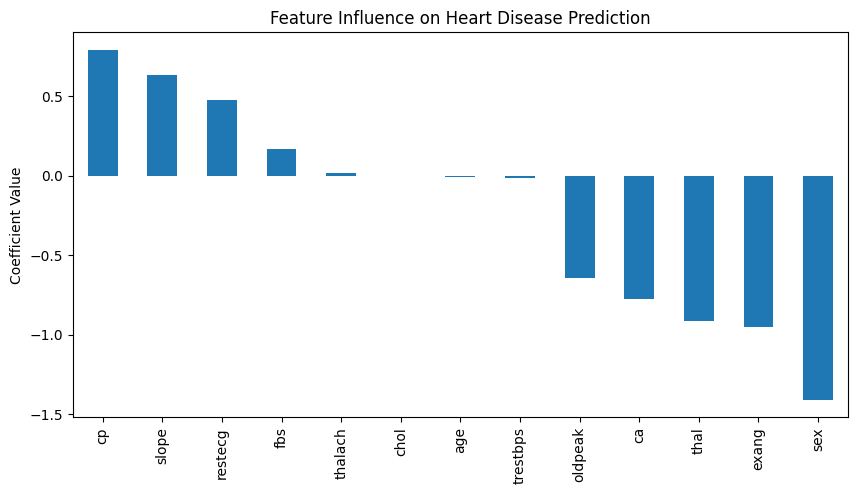

In [20]:
coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs.sort_values(ascending=False).plot(kind="bar", title="Feature Influence on Heart Disease Prediction", figsize=(10, 5))
plt.ylabel("Coefficient Value")
plt.show()


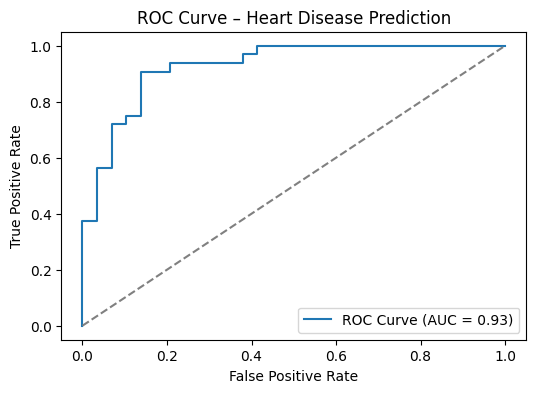

This means the model has a 93% chance of ranking a randomly chosen positive case (heart disease)
 higher than a randomly chosen negative case. High AUC = strong predictive power.


In [24]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Heart Disease Prediction")
plt.legend()
plt.show()
print("This means the model has a 93% chance of ranking a randomly chosen positive case (heart disease)\n higher than a randomly chosen negative case. High AUC = strong predictive power.")


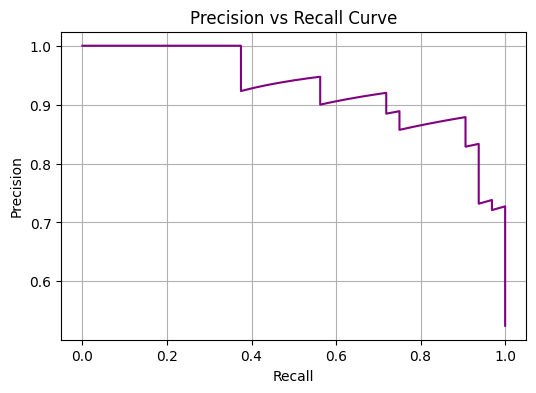

The curve stays high on both precision and recall until the very end, which shows that the model maintains good balance.
This is critical in medical predictions where false negatives (missed diagnoses) are dangerous.


In [28]:
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")
plt.grid(True)
plt.show()
print("The curve stays high on both precision and recall until the very end, which shows that the model maintains good balance.\nThis is critical in medical predictions where false negatives (missed diagnoses) are dangerous.")
